# simple regression model


In [1]:
# 1. Import dataset and display first 5 row
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df= pd.read_csv("tvmarketing.csv")
df
# 200*2

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [3]:
df.dtypes

TV       float64
Sales    float64
dtype: object

<Axes: xlabel='TV', ylabel='Sales'>

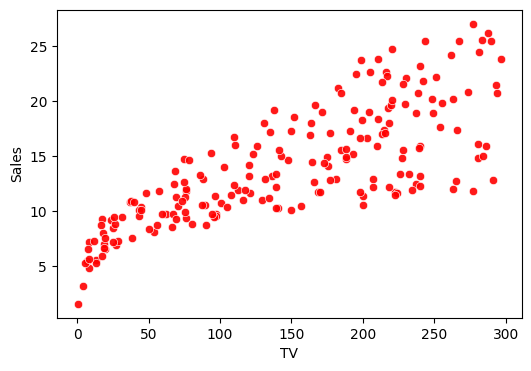

In [4]:
# 5. Visualize the relationship between the features and the dependent variable 
# using scatterplots

plt.figure(figsize=(6,4))
sns.scatterplot(data=df,x='TV',y='Sales',color='red',alpha=0.9)




In [5]:
# 6. Prepare X (feature variables) and y (response variable)

x=df[['TV']] # 2-D represent 
y=df['Sales'] # 1-D

print(f"shapes of x:{x.shape} and y:{y.shape}")



shapes of x:(200, 1) and y:(200,)


In [6]:
# 7. Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, 
# y_train, X_test, y_test

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)


In [7]:
# 8. Print the shape of train data and test data

print(f"Shape of x_train:{x_train.shape} and x_test:{x_test.shape}")

print(f"Shape of y_train:{y_train.shape} and y_test:{y_test.shape}")

Shape of x_train:(140, 1) and x_test:(60, 1)
Shape of y_train:(140,) and y_test:(60,)


In [8]:
# 9. Perform Linear Regression (on train data) without using any library and 
# print the coefficients values

# lets do from train data
import numpy as np
# x is independent have more than 1 cols as 2-D..so convert into 1-D using flatten
x_train_np = x_train.values.flatten()

# y is independent so its alreay in 1-D
y_train_np = y_train.values

# 2.cal means...
x_mean = np.mean(x_train_np)
y_mean=np.mean(y_train_np)

# according to linear equ..
# calulate slope and intercept values..
numerator = np.sum( (x_train_np-x_mean)*(y_train_np-y_mean))
denominator = np.sum((x_train_np-x_mean)**2)

# slope b1
b1= numerator/denominator

# intercept b0 as y=mx+c
b0 = y_mean-(b1*x_mean)

print(f"Manual linear regression model coefficient:")
print(f"slope:{b1}  and intercept:{b0}")




Manual linear regression model coefficient:
slope:0.04640780212815278  and intercept:7.2394598307511355


In [9]:
# 10.Create the model using the calculated coefficients and make predictions on 
# the testing set

y_pred = b0 + b1*x_test
print(y_pred[:5])

            TV
95   14.817854
15   16.307544
30   20.832305
158   7.782431
128  17.463099


In [10]:
# 11.Perform Linear Regression using library(sklearn)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x= df[['TV']]  #2-D
y=df['Sales'] #1-D

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

LR = LinearRegression()
LR.fit(x_train,y_train)


# 12.Print the intercept and coefficients
print(LR.coef_)
print(LR.intercept_)

# 13.Make predictions on the testing set - y_pred..
y_predicts = LR.predict(x_test)

print(y_predicts[:5])


[0.0464078]
7.239459830751138
[14.81785392 16.30754437 20.83230507  7.78243112 17.46309864]


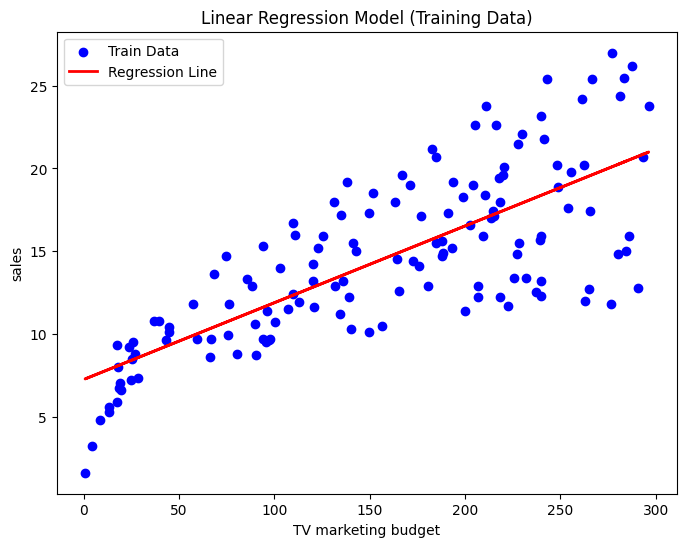

In [11]:
# 14.Plot train data and the model

import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
# for train data represents...
plt.scatter(x_train,y_train,color='blue',label='Train Data')
# for regression line plt...
plt.plot(x_train,LR.predict(x_train),color='red',linewidth=2, label="Regression Line")
plt.xlabel("TV marketing budget")
plt.ylabel("sales")
plt.legend()
plt.title("Linear Regression Model (Training Data)")
plt.show(
  
)


Text(0.5, 1.0, 'Linear regression model(test data)')

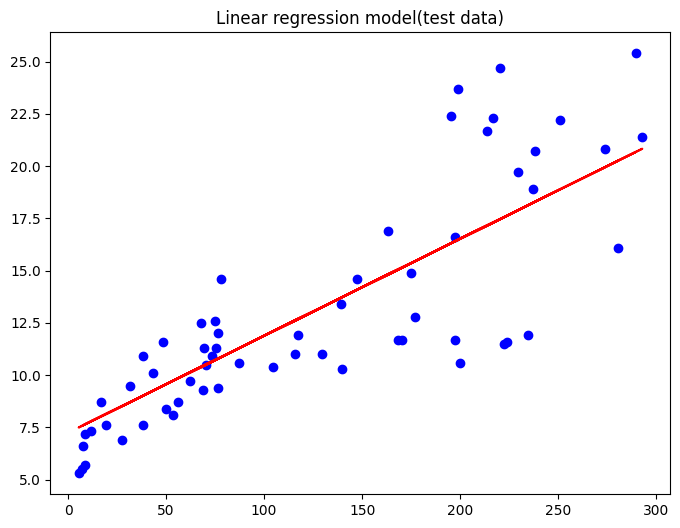

In [12]:
# 15.Plot test data and the model

plt.figure(figsize=(8,6))

# work on test data..
plt.scatter(x_test,y_test,color='blue',label="TEST data")

# lets work on regresssion model...
plt.plot(x_test,LR.predict(x_test),color='red',label="Regression line(test)")

plt.title("Linear regression model(test data)")




In [13]:
# 16.Print Mean Squared Error and R Squared Valu

from sklearn.metrics import mean_squared_error,r2_score

meanSq= mean_squared_error(y_test,y_pred)
r2Score = r2_score(y_test,y_pred)

print(f"meansSq:{meanSq} and r2Score:{r2Score}")

meansSq:8.970991242413612 and r2Score:0.6714477229302767


In [17]:
# 17.Calculate and print R Squared and Adjusted R Squared values without any library

# Convert test data and predictions to numpy arrays (if not already)
y_test_np = y_test.values.flatten()
y_pred = y_pred.values.flatten()
n = len(y_test_np)
p = 1


# Calculate R Squared manually
ss_total = np.sum((y_test_np - np.mean(y_test_np))**2)
ss_res = np.sum((y_test_np - y_pred)**2)
r_squared_manual = 1 - (ss_res/ss_total)

# Calculate Adjusted R Squared
adjusted_r_squared = 1 - (1 - r_squared_manual) * (n - 1) / (n - p - 1)

print("\nManual Evaluation:")
print("Manual R Squared:", r_squared_manual)
print("Manual Adjusted R Squared:", adjusted_r_squared)



Manual Evaluation:
Manual R Squared: 0.6714477229302767
Manual Adjusted R Squared: 0.66578302849804
